In [2]:
import numpy as np
import asset_calculations
import bond_calculations
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
bond_calculations.bond_price(100, 0.06, 0.06, 10)

99.99999999999997

In [4]:
rate_inc = bond_calculations.bond_price(100, 0.06, 0.065, 10, freq=2)
rate_dec = bond_calculations.bond_price(100, 0.06, 0.055, 10, freq=2)

print(f"increase: {rate_inc:.2f}")
print(f"decrease: {rate_dec:.2f}")

increase: 96.37
decrease: 103.81


In [11]:
rate_change = np.arange(-0.015, 0.020, 0.005)
print("base rate = 0.06")

for rate in rate_change:
    price = bond_calculations.bond_price(100, 0.06, 0.06 + rate, 10, freq=2)
    ytm = bond_calculations.bond_ytm(100, price, 0.06, 10)
    dur = bond_calculations.bond_duration(100, 0.06, 0.06 + rate, 10, True, freq=2)
        
    print(f"rate {(rate + 0.06)*100:.1f} : price {price:.2f} : ytm {ytm:.3f} : duration {dur:.3f}")

base rate = 0.06
rate 4.5 : price 111.97 : ytm 0.045 : duration 7.639
rate 5.0 : price 107.79 : ytm 0.050 : duration 7.572
rate 5.5 : price 103.81 : ytm 0.055 : duration 7.506
rate 6.0 : price 100.00 : ytm 0.060 : duration 7.439
rate 6.5 : price 96.37 : ytm 0.065 : duration 7.371
rate 7.0 : price 92.89 : ytm 0.070 : duration 7.304
rate 7.5 : price 89.58 : ytm 0.074 : duration 7.236
rate 8.0 : price 86.41 : ytm 0.079 : duration 7.168


In [6]:
data = yf.download("0P0000TKZO.L", start="2010-01-01")["Adj Close"]

((data[-1] - data[:1]) / data[:1]).values * 100

[*********************100%***********************]  1 of 1 completed


array([47.69514389])

[*********************100%***********************]  1 of 1 completed
Maximum Drawdown: -52.58% on 09-03-2009
Recent 252 Day Maximum Drawdown: -25.43% on         12-10-2022


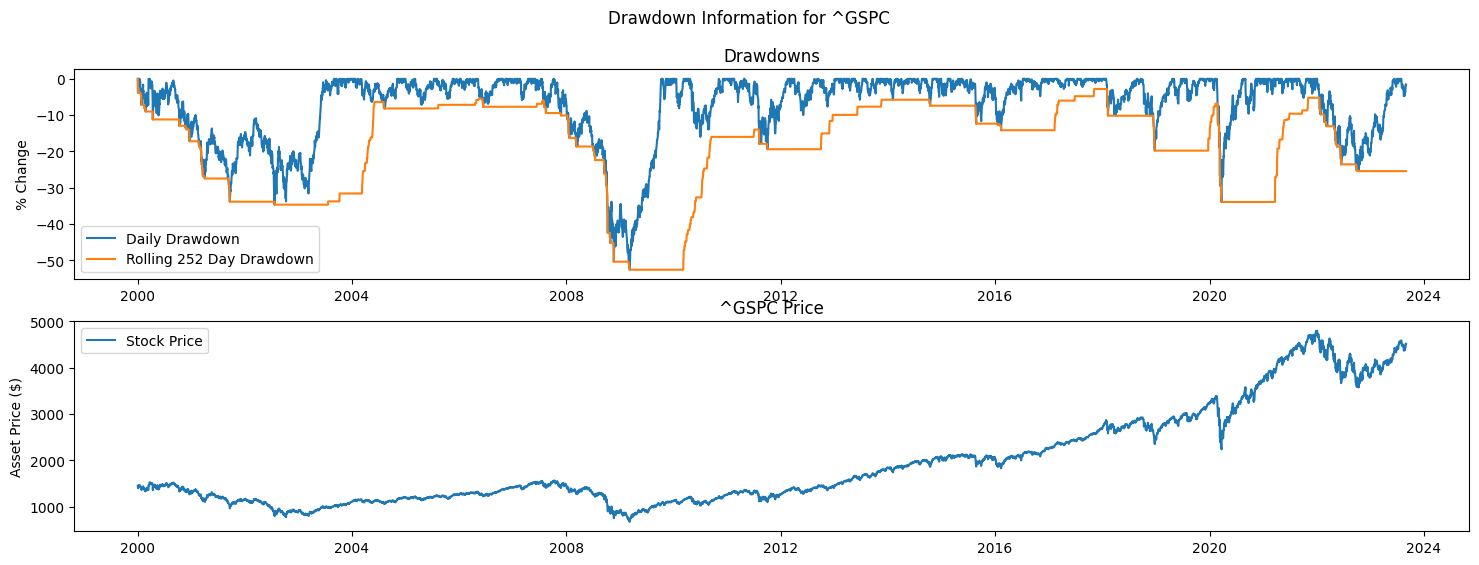

In [7]:
asset_calculations.asset_drawdown("^GSPC", start_time="2000-01-01", end_time=None, plot=True)

In [8]:
data = yf.download("0P0000TKZO.L", start="2010-01-01")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [9]:
def asset_drawdown(asset: str, start_time: str, end_time: str=None, plot: bool=False):
    """
    returns drawdown information for a given asset
    
    parameters:
        asset: asset ticker
        start_time: time to start analysis from
        end_time: optional time to end analysis data
        plot: optional bool to plot the information as opposed to receiving values
    returns:
        daily_drawdown (float, vector): vector of daily drawdowns
        max_daily_drawdowns (float, vector): vector of the maximum daily drawdown over a 252 day window 
    """
    
    data = yf.download(asset, start=start_time, end=end_time)["Adj Close"]
    window = 252
    
    rolling_max = data.rolling(window, min_periods=1).max()
    daily_drawdown = data / rolling_max - 1
    max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
    
    print(f"Maximum Drawdown: {daily_drawdown.min() * 100:.2f}% on {daily_drawdown.idxmin().strftime('%d-%m-%Y')}")
    print(f"Recent {window} Day Maximum Drawdown: {max_daily_drawdown[-1] * 100:.2f}% on {max_daily_drawdown.loc[max_daily_drawdown == max_daily_drawdown[-1]].index[0].strftime('%d-%m-%Y')}")
    
    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(18, 6), sharex=False)
        
        fig.suptitle(f"Drawdown Information for {asset}")

        ax[0].set_title("Drawdowns")
        ax[0].plot(daily_drawdown * 100, label="Daily Drawdown")
        ax[0].plot(max_daily_drawdown * 100, label=f"Rolling {window} Day Drawdown")
        ax[0].set_ylabel("% Change")
        ax[0].legend()

        ax[1].set_title(f"{asset} Price")
        ax[1].plot(data, label="Stock Price")
        ax[1].set_ylabel("Asset Price ($)")
        ax[1].legend()
    else:
        return daily_drawdown, max_daily_drawdown

[*********************100%***********************]  1 of 1 completed
Maximum Drawdown: -54.06% on 11-10-2022
Recent 252 Day Maximum Drawdown: -54.06% on 11-10-2022


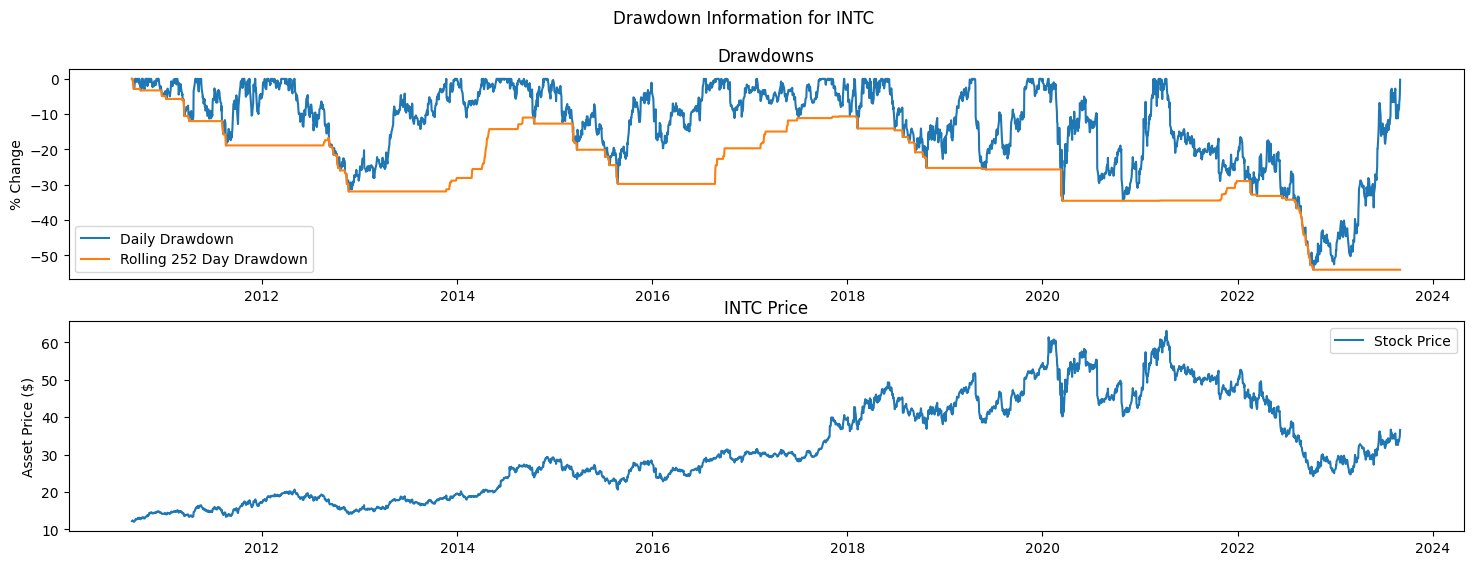

In [10]:
asset_drawdown("INTC", start_time="2010-09-01", end_time=None, plot=True)